## 1. Understand the data.
<p>In this assignment, you will delve into the exciting journey of machine learning by applying predictive analytics to solve a real-world problem: sale amount prediction. This lab will provide you with hands-on experience in building and evaluating machine learning models using Python and popular libraries such as scikit-learn.</p>
<p>Step 1: As usual, understanding the data is the first step of your machine learning project.</p>

In [1]:
# Importing the pandas package
import pandas as pd

# Reading in house_CM.csv, which is comma delimited.
df=pd.read_csv('Advertising.csv', index_col = 0)

# Print the number of features, number of data points
print(df.shape)

# Print the name of the features of the data points
print(df.columns)

# Clean the columns names
df.columns = [name.strip() for name in list(df.columns)]
print(df.columns)

# Print the information of the dataset and check data types
df.info()

(200, 4)
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## 2. Data Preprocessing
<p>Data preprocessing is a critical step in machine learning that involves transforming raw data into a format that is suitable for analysis and modeling. It's an essential part of the machine learning pipeline because the quality of the data directly impacts the performance and accuracy of the models built upon it.</p>

In [8]:
# select the dependent and target
sel_feature = ["newspaper"]
X=df[sel_feature].values
y=df['sales'].values

# Import the libary to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3, 
                                                    random_state=42)


# Print the size of the training and testing data
print(X_train.shape, X_test.shape)

## Perform feature scaling using scikit-learn
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)



(140, 1) (60, 1)


## 3. Use scikit-learn library to train the model
<p>In this exercise, we are going to use the scikit-learn module to traing the model.</p>
<p> The sickit-learn <b>fit</b> function fits the linear regression model to the training data. It learns the coefficients (weights) of the linear regression model that minimize the residual sum of squares between the observed and predicted target values.</p>

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_scaled, y_train)


LinearRegression()

## 4. Check the parameters
<p>Retrieves the value of the parameters corresponding to the minimum cost.</p>

In [10]:
best_parameters = [lr.coef_, lr.intercept_]

# print the values of the parameters 
print(best_parameters)

[array([1.25674189]), 14.497142857142858]


## 5. Perform the predictions
<p>Now that we have identified the best parameters corresponding to the minimum cost. Make predictions using the function <b>predict</b> from Python scikit-learn moduel</p>

In [11]:
# predict the sales for the testing data
X_test_scaled = scale.transform(X_test)
ytest_pred = lr.predict(X_test_scaled)

#predict the sales for the training data
ytrain_pred = lr.predict(X_scaled)

## 6. Visualize the results.
<p>Draw a scatter plot to visualize the relationship between the selected program variable (sel_feature) and the sales data, along with the predicted sales based on the best parameters.</p>

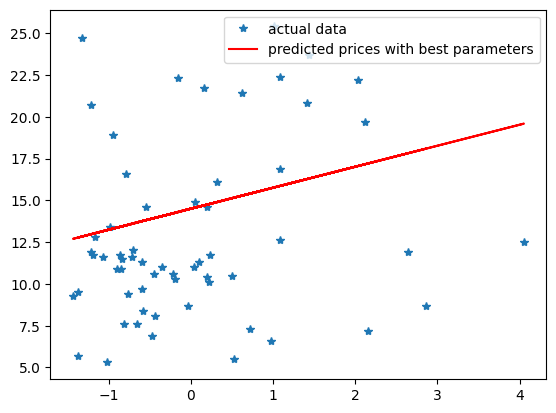

In [12]:
# import matplotlib for visualization
import matplotlib.pyplot as plt

# plot the actual data points
plt.plot(X_test_scaled,  y_test, '*')

plt.plot(X_test_scaled,  ytest_pred, 'r')
plt.legend(['actual data', 'predicted prices with best parameters'])
plt.show()

## 7. Evaluate the results using metrics

<p>Evaluating the performance of the trained linear regression model is crucial for assessing model fit, detecting overfitting, understanding prediction accuracy, comparing models, iteratively improving the model, and establishing baseline performance. </p>
<p>The model's performance should be evaluated on both the trained data and test data sets for ensuring model effectiveness and generalization ability.</p>

In [13]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evauate on the training set
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

# evauate on the testing set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  4.053227414636463
Mean squared error:  24.661591659380573
R2 score is:  0.060188280503297276
Mean absolute error:  4.560287697533893
Mean squared error:  28.869194440672985
R2 score is:  -0.05730117378866084


## 8. Submit for the grade.
<p>Change the below cell code for the final submission</p>

In [14]:
# Edit the below code to change to your name.
name = "Lwin Moe Oo"
print("Submitted by", name)

Submitted by Lwin Moe Oo
